In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from modules.immothep_utils import drop_extreme

%load_ext autoreload
%autoreload 2

In [30]:
cols = ['Valeur fonciere', 'Surface reelle bati', 'Nombre pieces principales']

df = pd.read_csv('../datas/RAW/immothep_3.csv', delimiter='|', decimal=',', nrows=100000)
df.shape

C:\Users\utilisateur\anaconda3\envs\sandbox\lib\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(100000, 43)

In [32]:
df[['Code type local', 'Type local']]

,Code type local,Type local
0,4.0,Local industriel. commercial ou assimilé
1,2.0,Appartement
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
99995,NaN,NaN
99996,NaN,NaN
99997,NaN,NaN
99998,NaN,NaN


In [28]:
df = df[df['Code type local'] == 2]
df.shape

(14690, 43)

<AxesSubplot:>

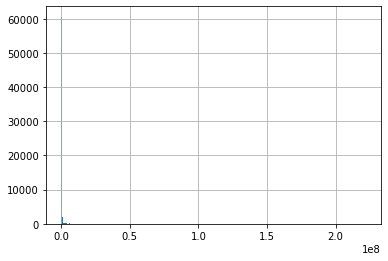

In [21]:
df['Valeur fonciere'].hist(bins=1000)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

def plotGraph(pdf, pscaled_df, scaler=None):
    fig, (a, b) = plt.subplots(ncols=2, figsize=(16, 5))

    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)

    b.set_title("Apres mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pscaled_df[col], ax=b)

    fig.legend(cols)
    fig.suptitle(scaler.__class__.__name__, fontsize=16)

    plt.show()
    

cols = ['Valeur fonciere', 'Surface reelle bati', 'Nombre pieces principales']

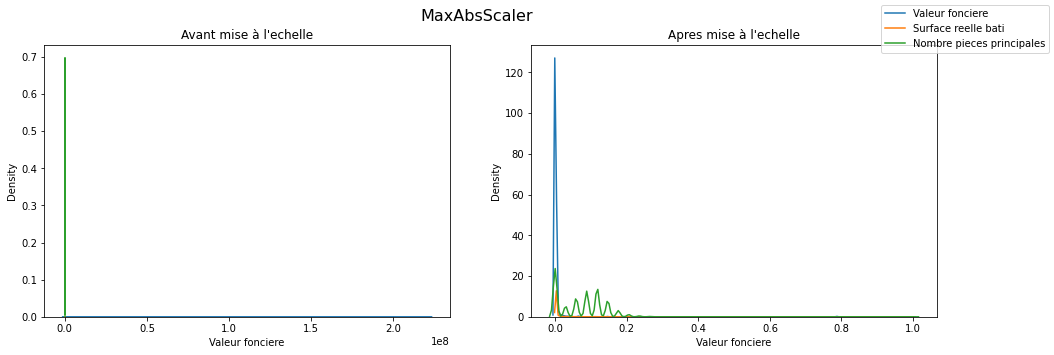

In [5]:
scaler = MaxAbsScaler()
scaled_df = scaler.fit_transform(df[cols])
scaled_df = pd.DataFrame(scaled_df, columns=cols)
plotGraph(df[cols], scaled_df, scaler)

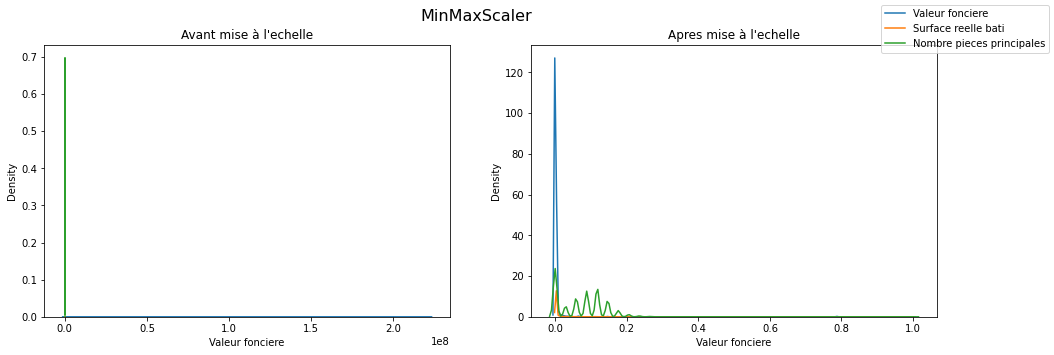

In [6]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[cols])
scaled_df = pd.DataFrame(scaled_df, columns=cols)
plotGraph(df[cols], scaled_df, scaler)

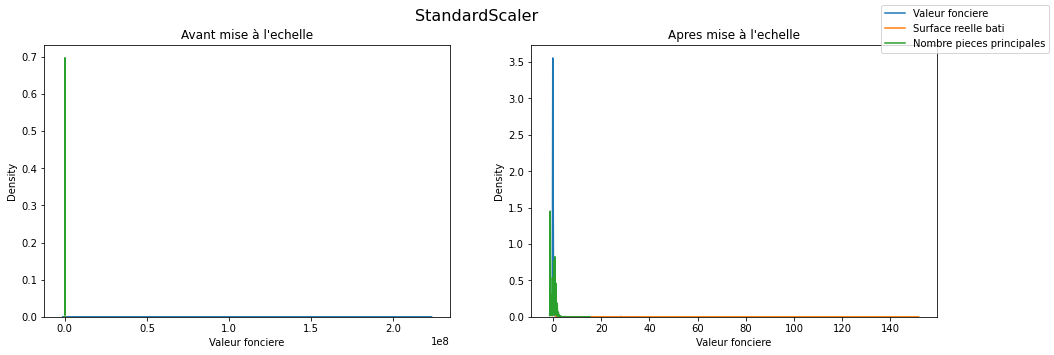

In [7]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[cols])
scaled_df = pd.DataFrame(scaled_df, columns=cols)
plotGraph(df[cols], scaled_df, scaler)

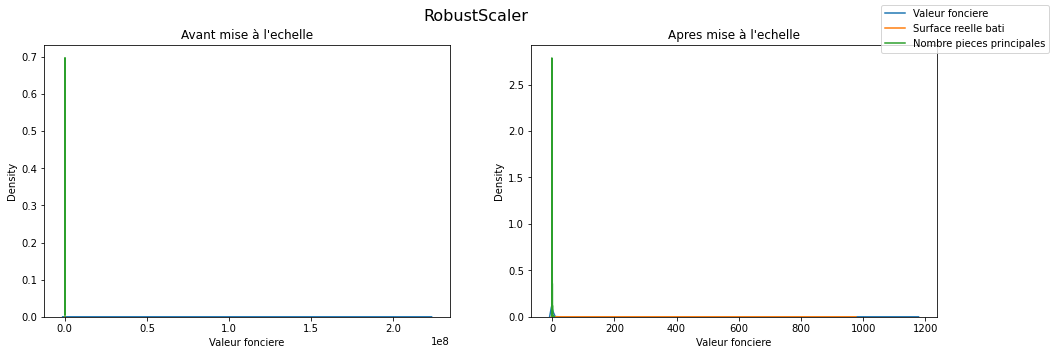

In [8]:
scaler = RobustScaler()
scaled_df = scaler.fit_transform(df[cols])
scaled_df = pd.DataFrame(scaled_df, columns=cols)
plotGraph(df[cols], scaled_df, scaler)